### Part 1 : Voronoi mesh generation

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import os
import sys
#adding path to source directory
sys.path.insert(0, '../mf6Voronoi')
import geopandas as gpd
from geoVoronoi import createVoronoi
from geoUtils import plotOrgDistPoints, plotCirclesPoints, plotKeyList


ModuleNotFoundError: No module named 'geoUtils'

In [2]:
#Create mesh object specifying the coarse mesh and the multiplier
vorMesh = createVoronoi()

#Define base refinement and refinement levels
# vorMesh.defineParameters(maxRef = 500, multiplier=2.5)

#Open limit layers and refinement definition layers
vorMesh.addLimit('basin','../examples/stibniteMine/Shp/catchment_11N.shp')
vorMesh.addLayer('water','../examples/stibniteMine/Shp/river_basin_11N.shp',20)
vorMesh.addLayer('pit','../examples/stibniteMine/Shp/minePits_11N.shp',50)
vorMesh.addLayer('dump','../examples/stibniteMine/Shp/mineDumps_11N.shp',50)
vorMesh.addLayer('faults','../examples/stibniteMine/Shp/faults.shp',5)

In [3]:
#Generate point pair array
vorMesh.generateOrgDistVertices()

#Generate the point cloud and voronoi
vorMesh.createPointCloud()
vorMesh.generateVoronoi()


/--------Layer water discretization-------/
Progressive cell size list: [20, 70.0, 195.0] m.

/--------Layer pit discretization-------/
Progressive cell size list: [50, 175.0, 487.5] m.

/--------Layer dump discretization-------/
Progressive cell size list: [50, 175.0, 487.5] m.

/--------Layer faults discretization-------/
Progressive cell size list: [5, 17.5, 48.75, 126.875, 322.1875] m.

/----Sumary of points for voronoi meshing----/
Distributed points from layers: 4
Points from layer buffers: 28796
Points from max refinement areas: 711
Points from min refinement areas: 251
Total points inside the limit: 40597
/--------------------------------------------/

Time required for point generation: 42.37 seconds 


/----Generation of the voronoi mesh----/

Time required for voronoi generation: 19.38 seconds 



In [4]:


# #Open limit layers and refinement definition layers
# vorMesh.addLimit('basin','../examples/stibniteMine/Shp/catchment_11N.shp')
# vorMesh.addLayer('water','../examples/stibniteMine/Shp/river_basin_11N.shp',20)
# vorMesh.addLayer('pit','../examples/stibniteMine/Shp/minePits_11N.shp',50)
# vorMesh.addLayer('dump','../examples/stibniteMine/Shp/mineDumps_11N.shp',50)
# vorMesh.addLayer('faults','../examples/stibniteMine/Shp/faults.shp',5)

# #Generate point pair array
# vorMesh.generateOrgDistVertices()

# #Generate the point cloud and voronoi
# vorMesh.createPointCloud()
# vorMesh.generateVoronoi()


AttributeError: 'createVoronoi' object has no attribute 'discGeoms'

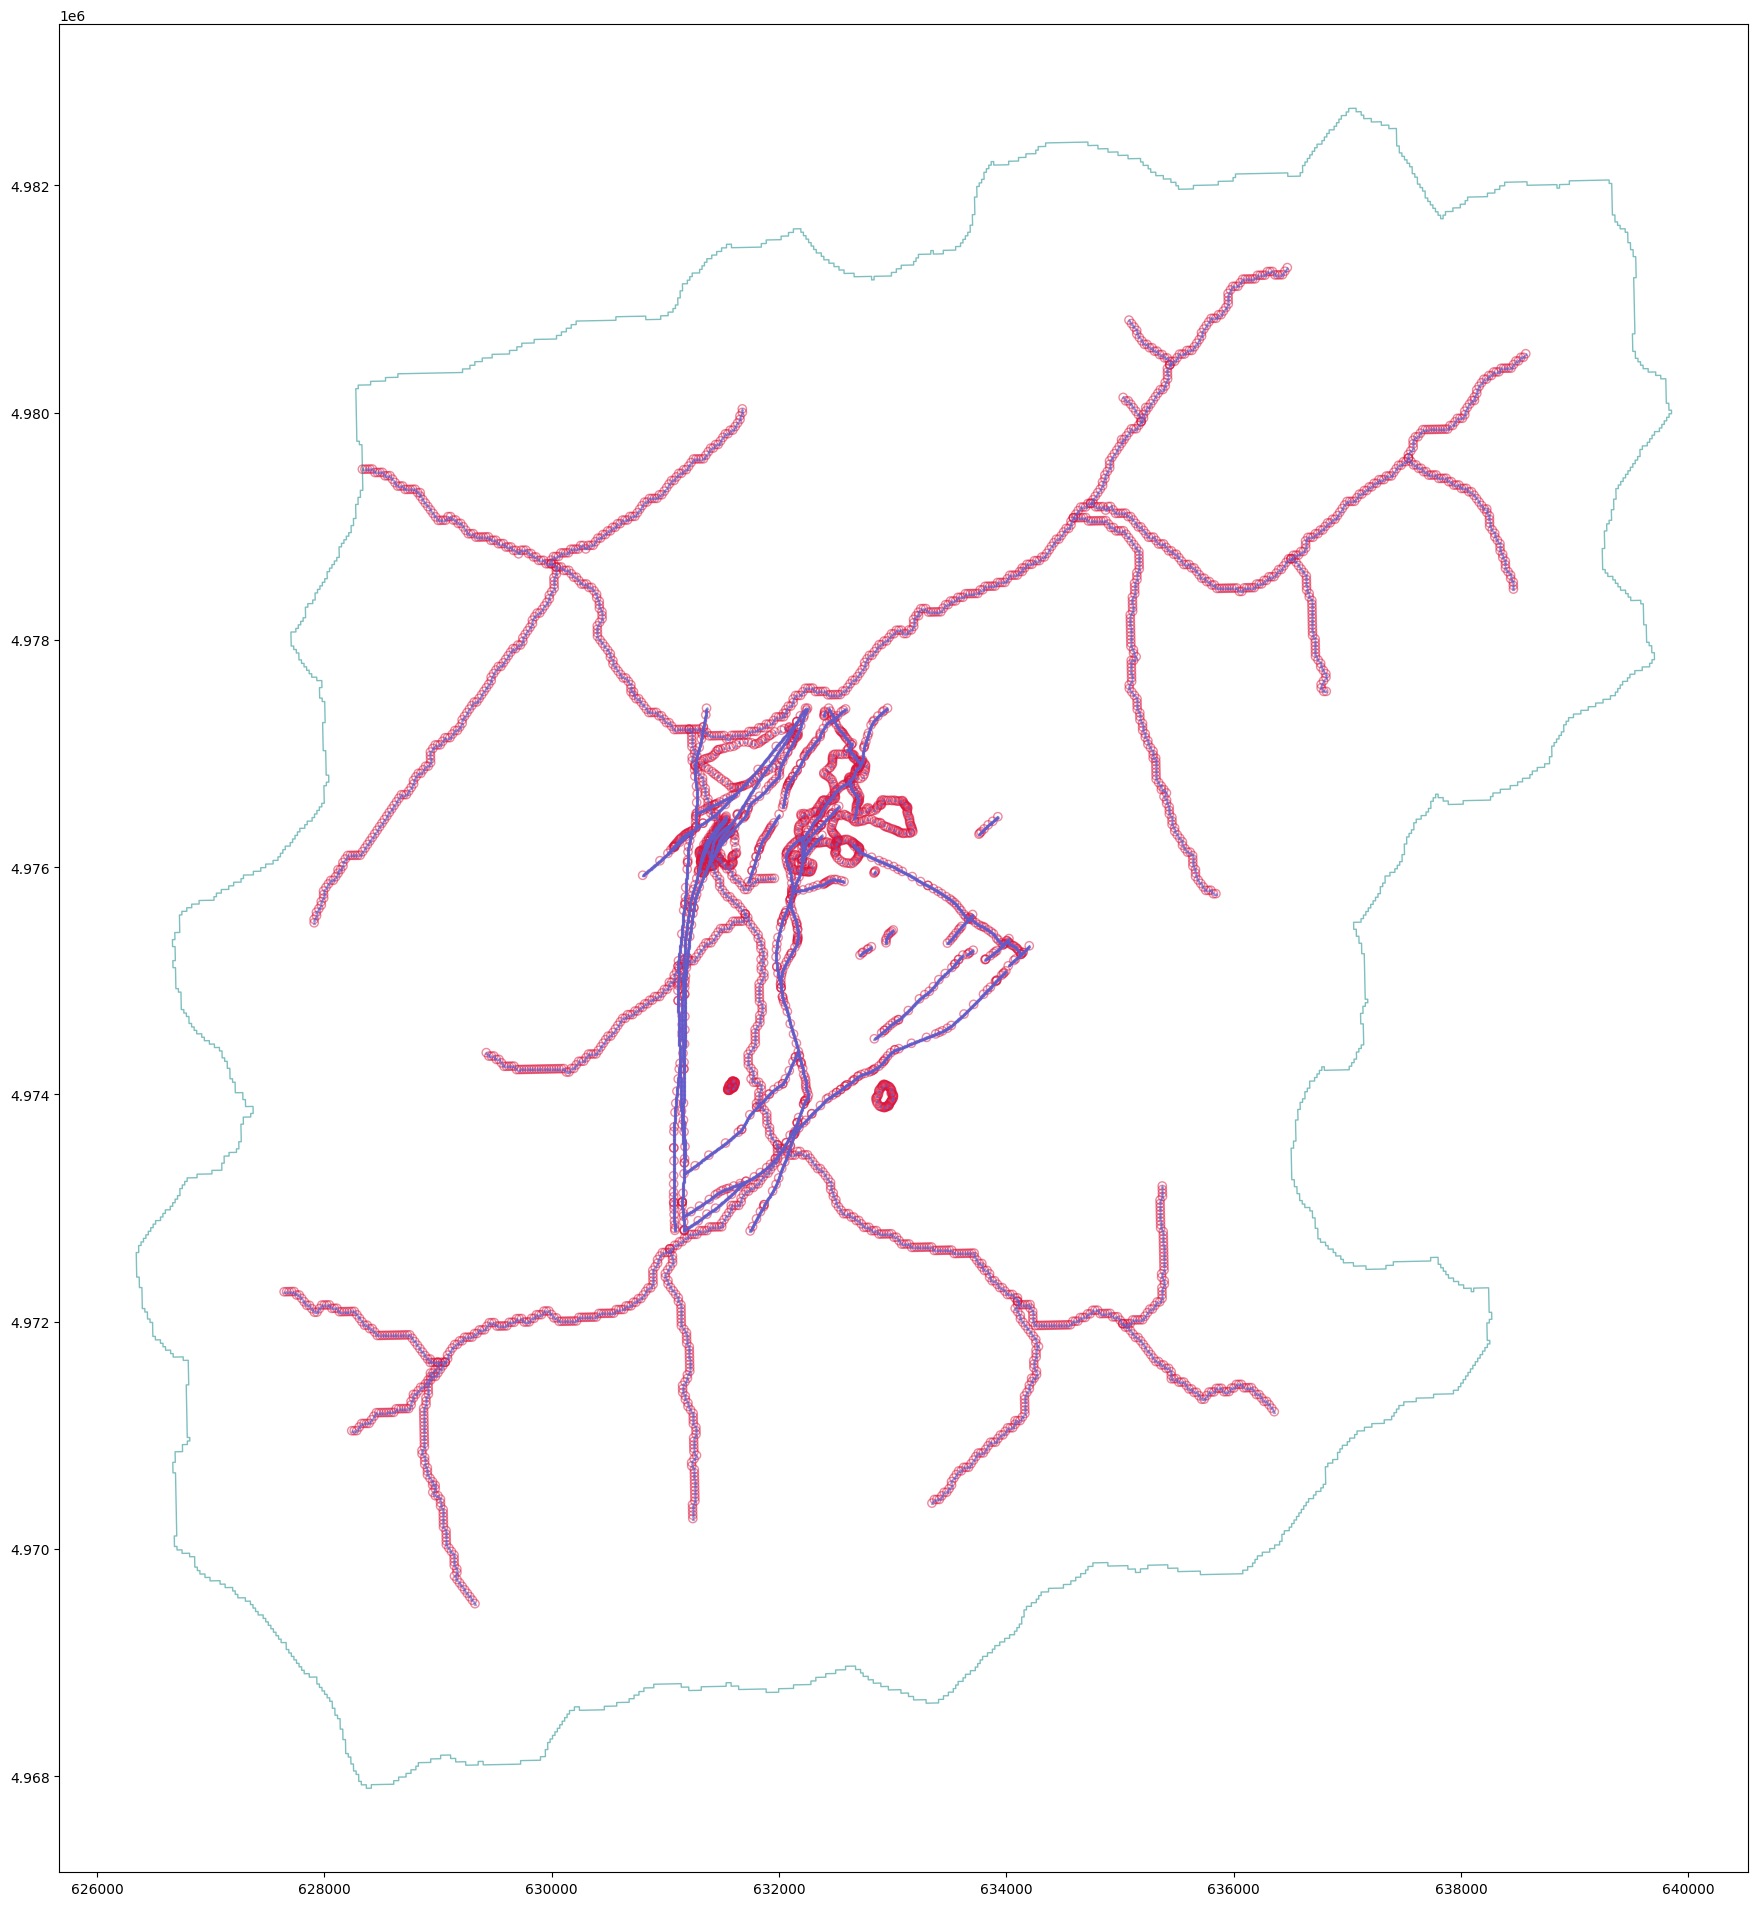

In [5]:
plotOrgDistPoints(vorMesh)


AttributeError: 'createVoronoi' object has no attribute 'discGeoms'

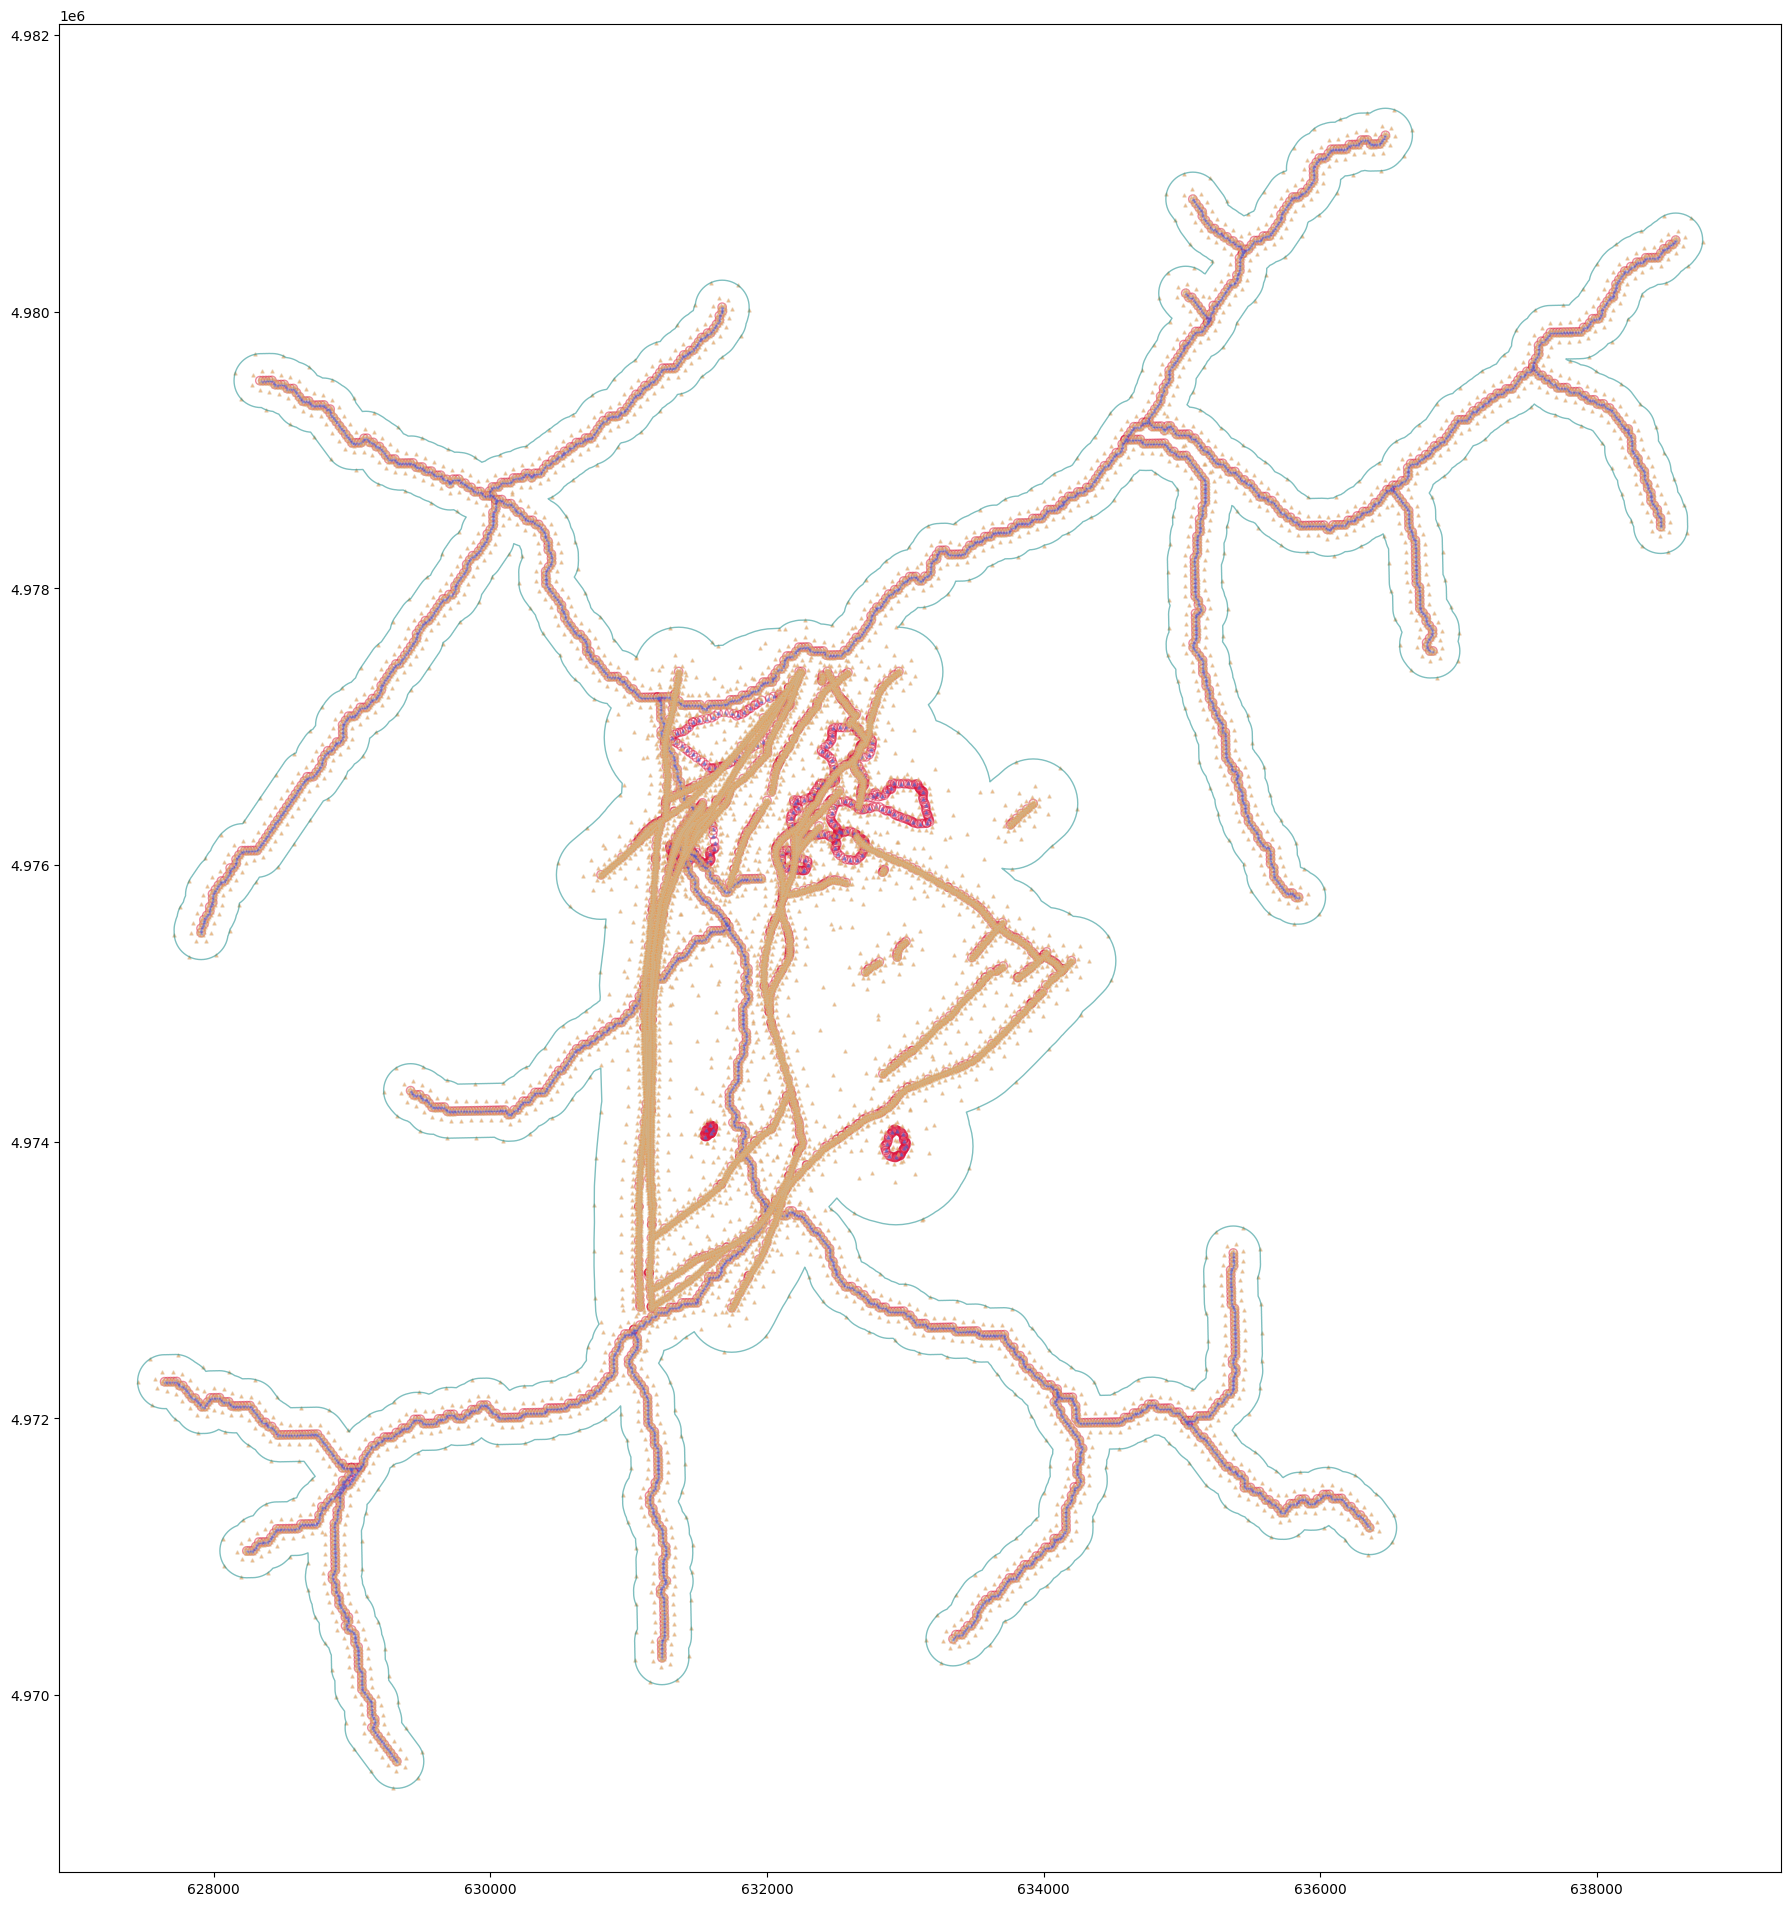

In [6]:
plotCirclesPoints(vorMesh)

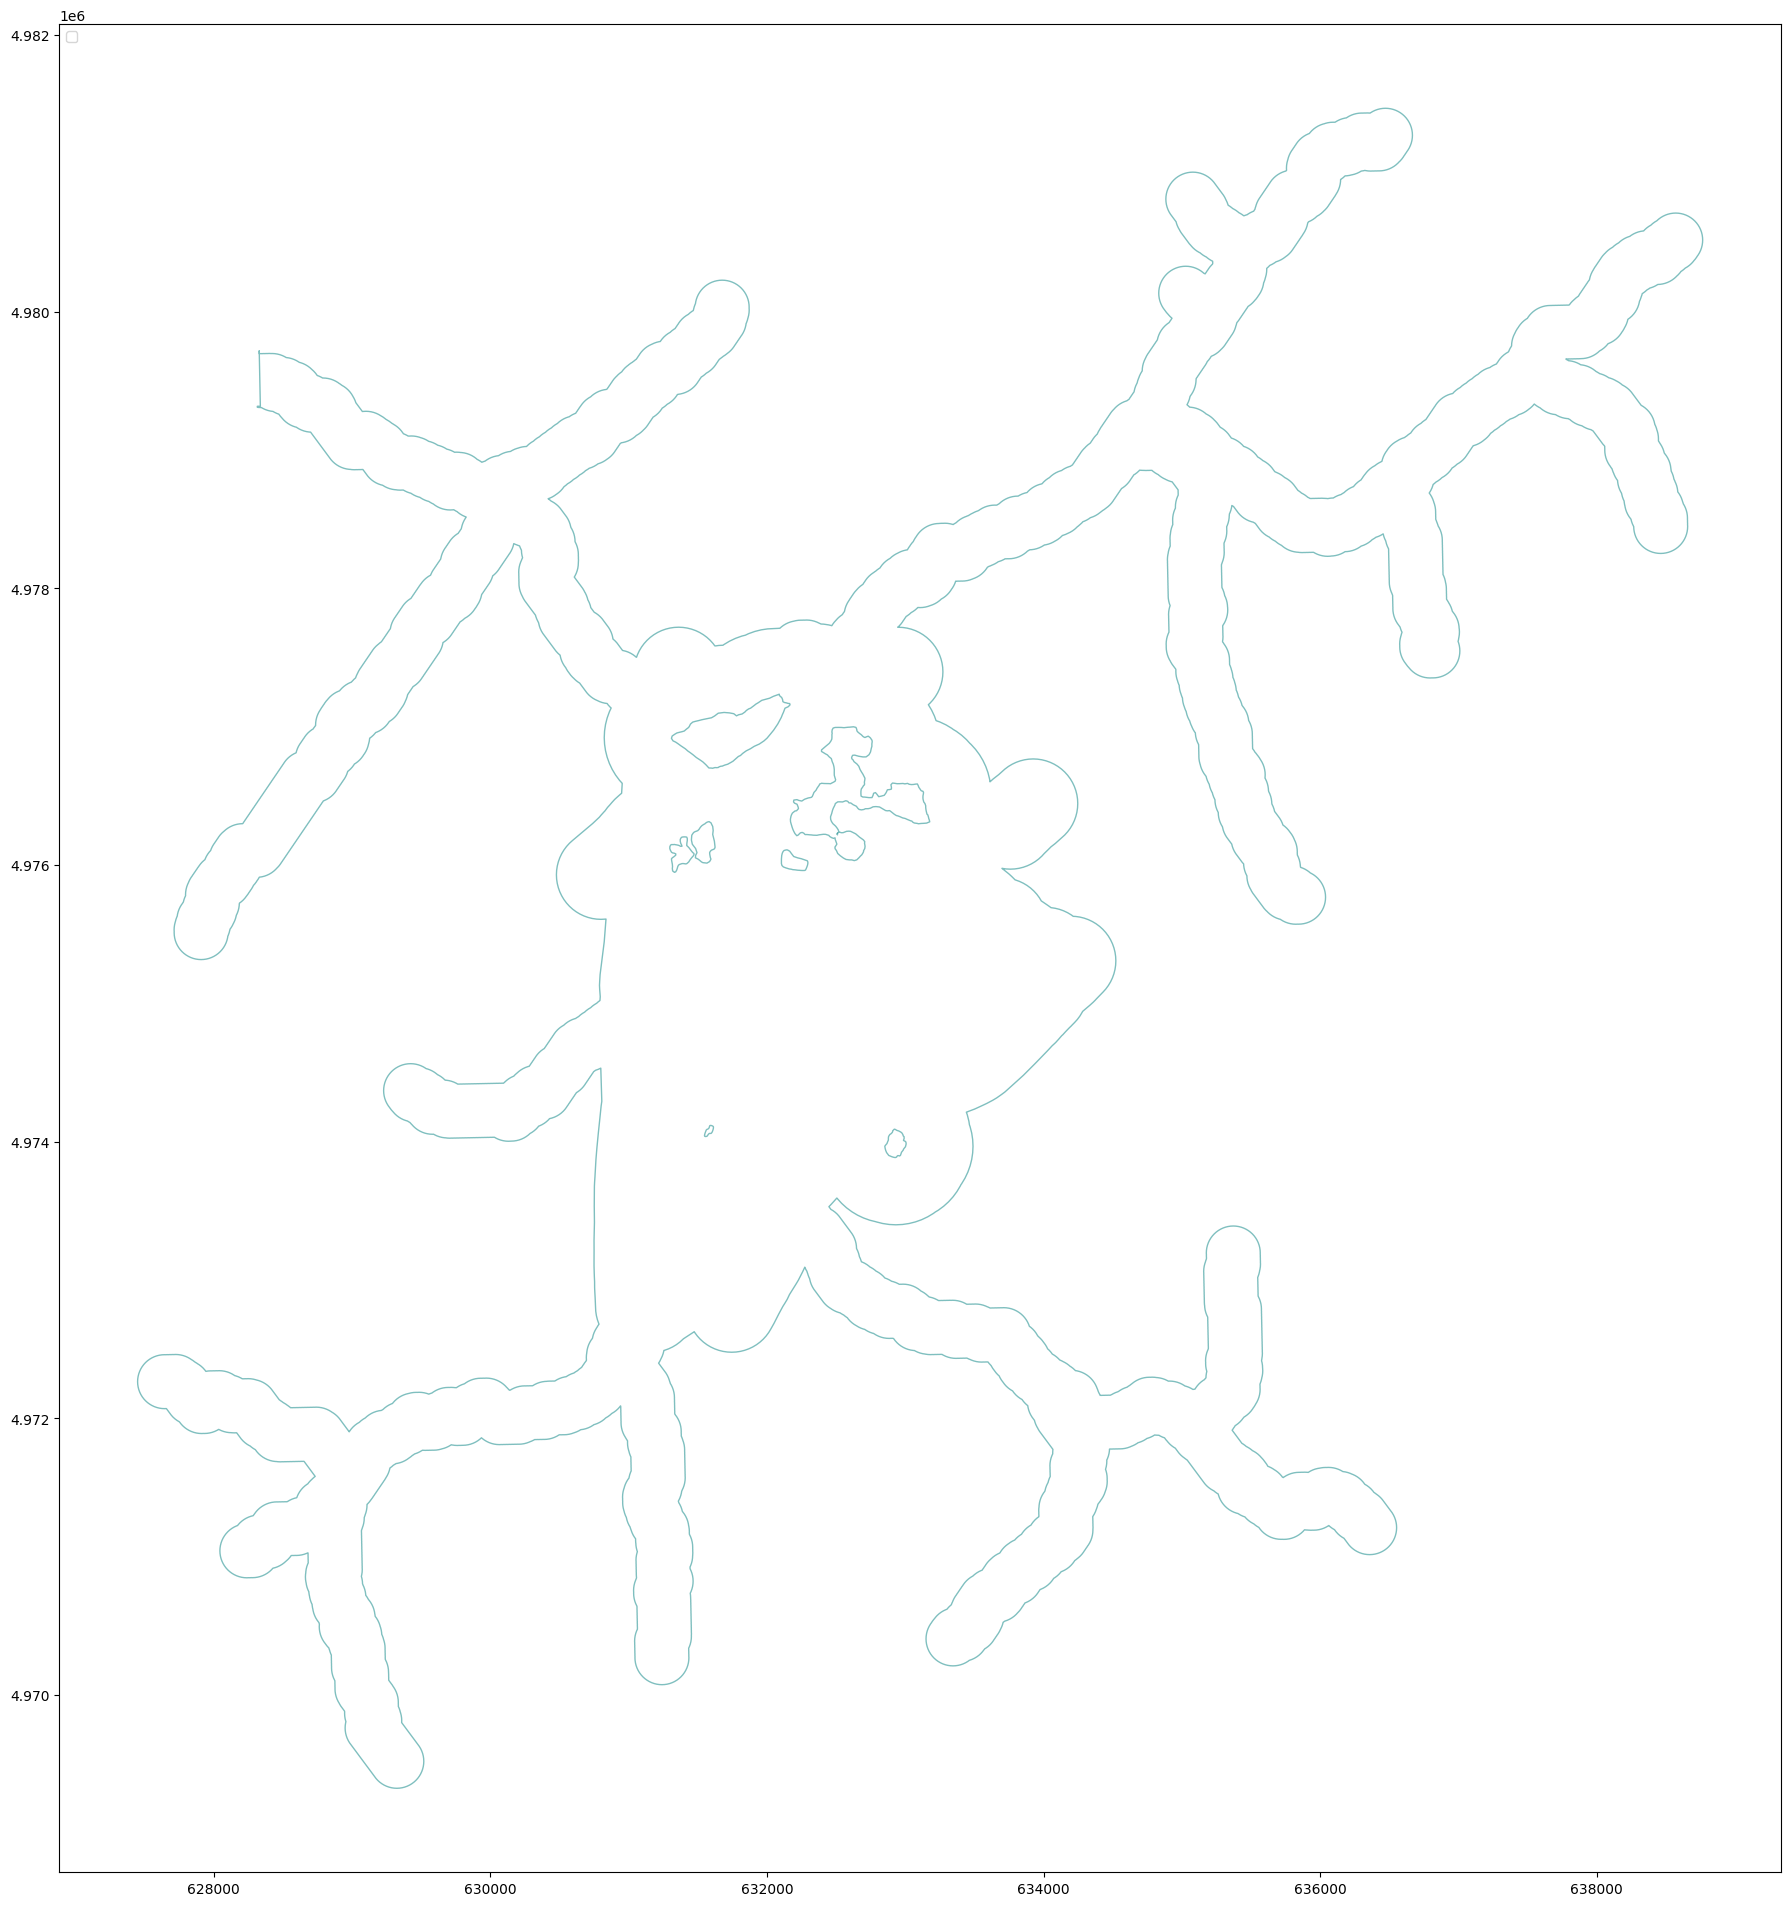

In [7]:
plotKeyList(vorMesh, ['pointsMaxRefPoly'])

In [9]:
#check or create an output folder
outPath = '../examples/stibniteMine/output'
if os.path.isdir(outPath):
    print('The output folder %s exists'%outPath)
else:
    os.mkdir(outPath)
    print('The output folder %s has been generated.'%outPath)

#Export point data and voronoi polygons
#Points
# vorMesh.getPointsAsShp('vertexOrg',outPath+'/vertexOrg.shp')
# vorMesh.getPointsAsShp('vertexDist',outPath+'/vertexDist.shp')
# vorMesh.getPointsAsShp('vertexBuffer',outPath+'/vertexBuffer.shp')


The output folder ../examples/stibniteMine/output exists


In [10]:
#vorMesh.getPointsAsShp('vertexDist',outPath+'/vertexDist.shp')
vorMesh.getPointsAsShp('vertexBuffer',outPath+'/vertexBuffer.shp')
vorMesh.getPointsAsShp('vertexMaxRef',outPath+'/vertexMaxRef.shp')
vorMesh.getPointsAsShp('vertexMinRef',outPath+'/vertexMinRef.shp')

In [11]:
# vorMesh.getPointsAsShp('vertexMaxRef',outPath+'/vertexMaxRef.shp')
# vorMesh.getPointsAsShp('vertexMinRef',outPath+'/vertexMinRef.shp')
# vorMesh.getPointsAsShp('vertexTotal',outPath+'/vertexTotal.shp')
#Polygons

vorMesh.getPolyAsShp('voronoiRegions',outPath+'/voronoiRegions.shp')


/----Generation of the voronoi shapefile----/

Time required for voronoi shapefile: 26.29 seconds 



In [12]:
# Show the resulting voronoi mesh

#open the mesh file
mesh=gpd.read_file(outPath+'/voronoiRegions.shp')

<Axes: >

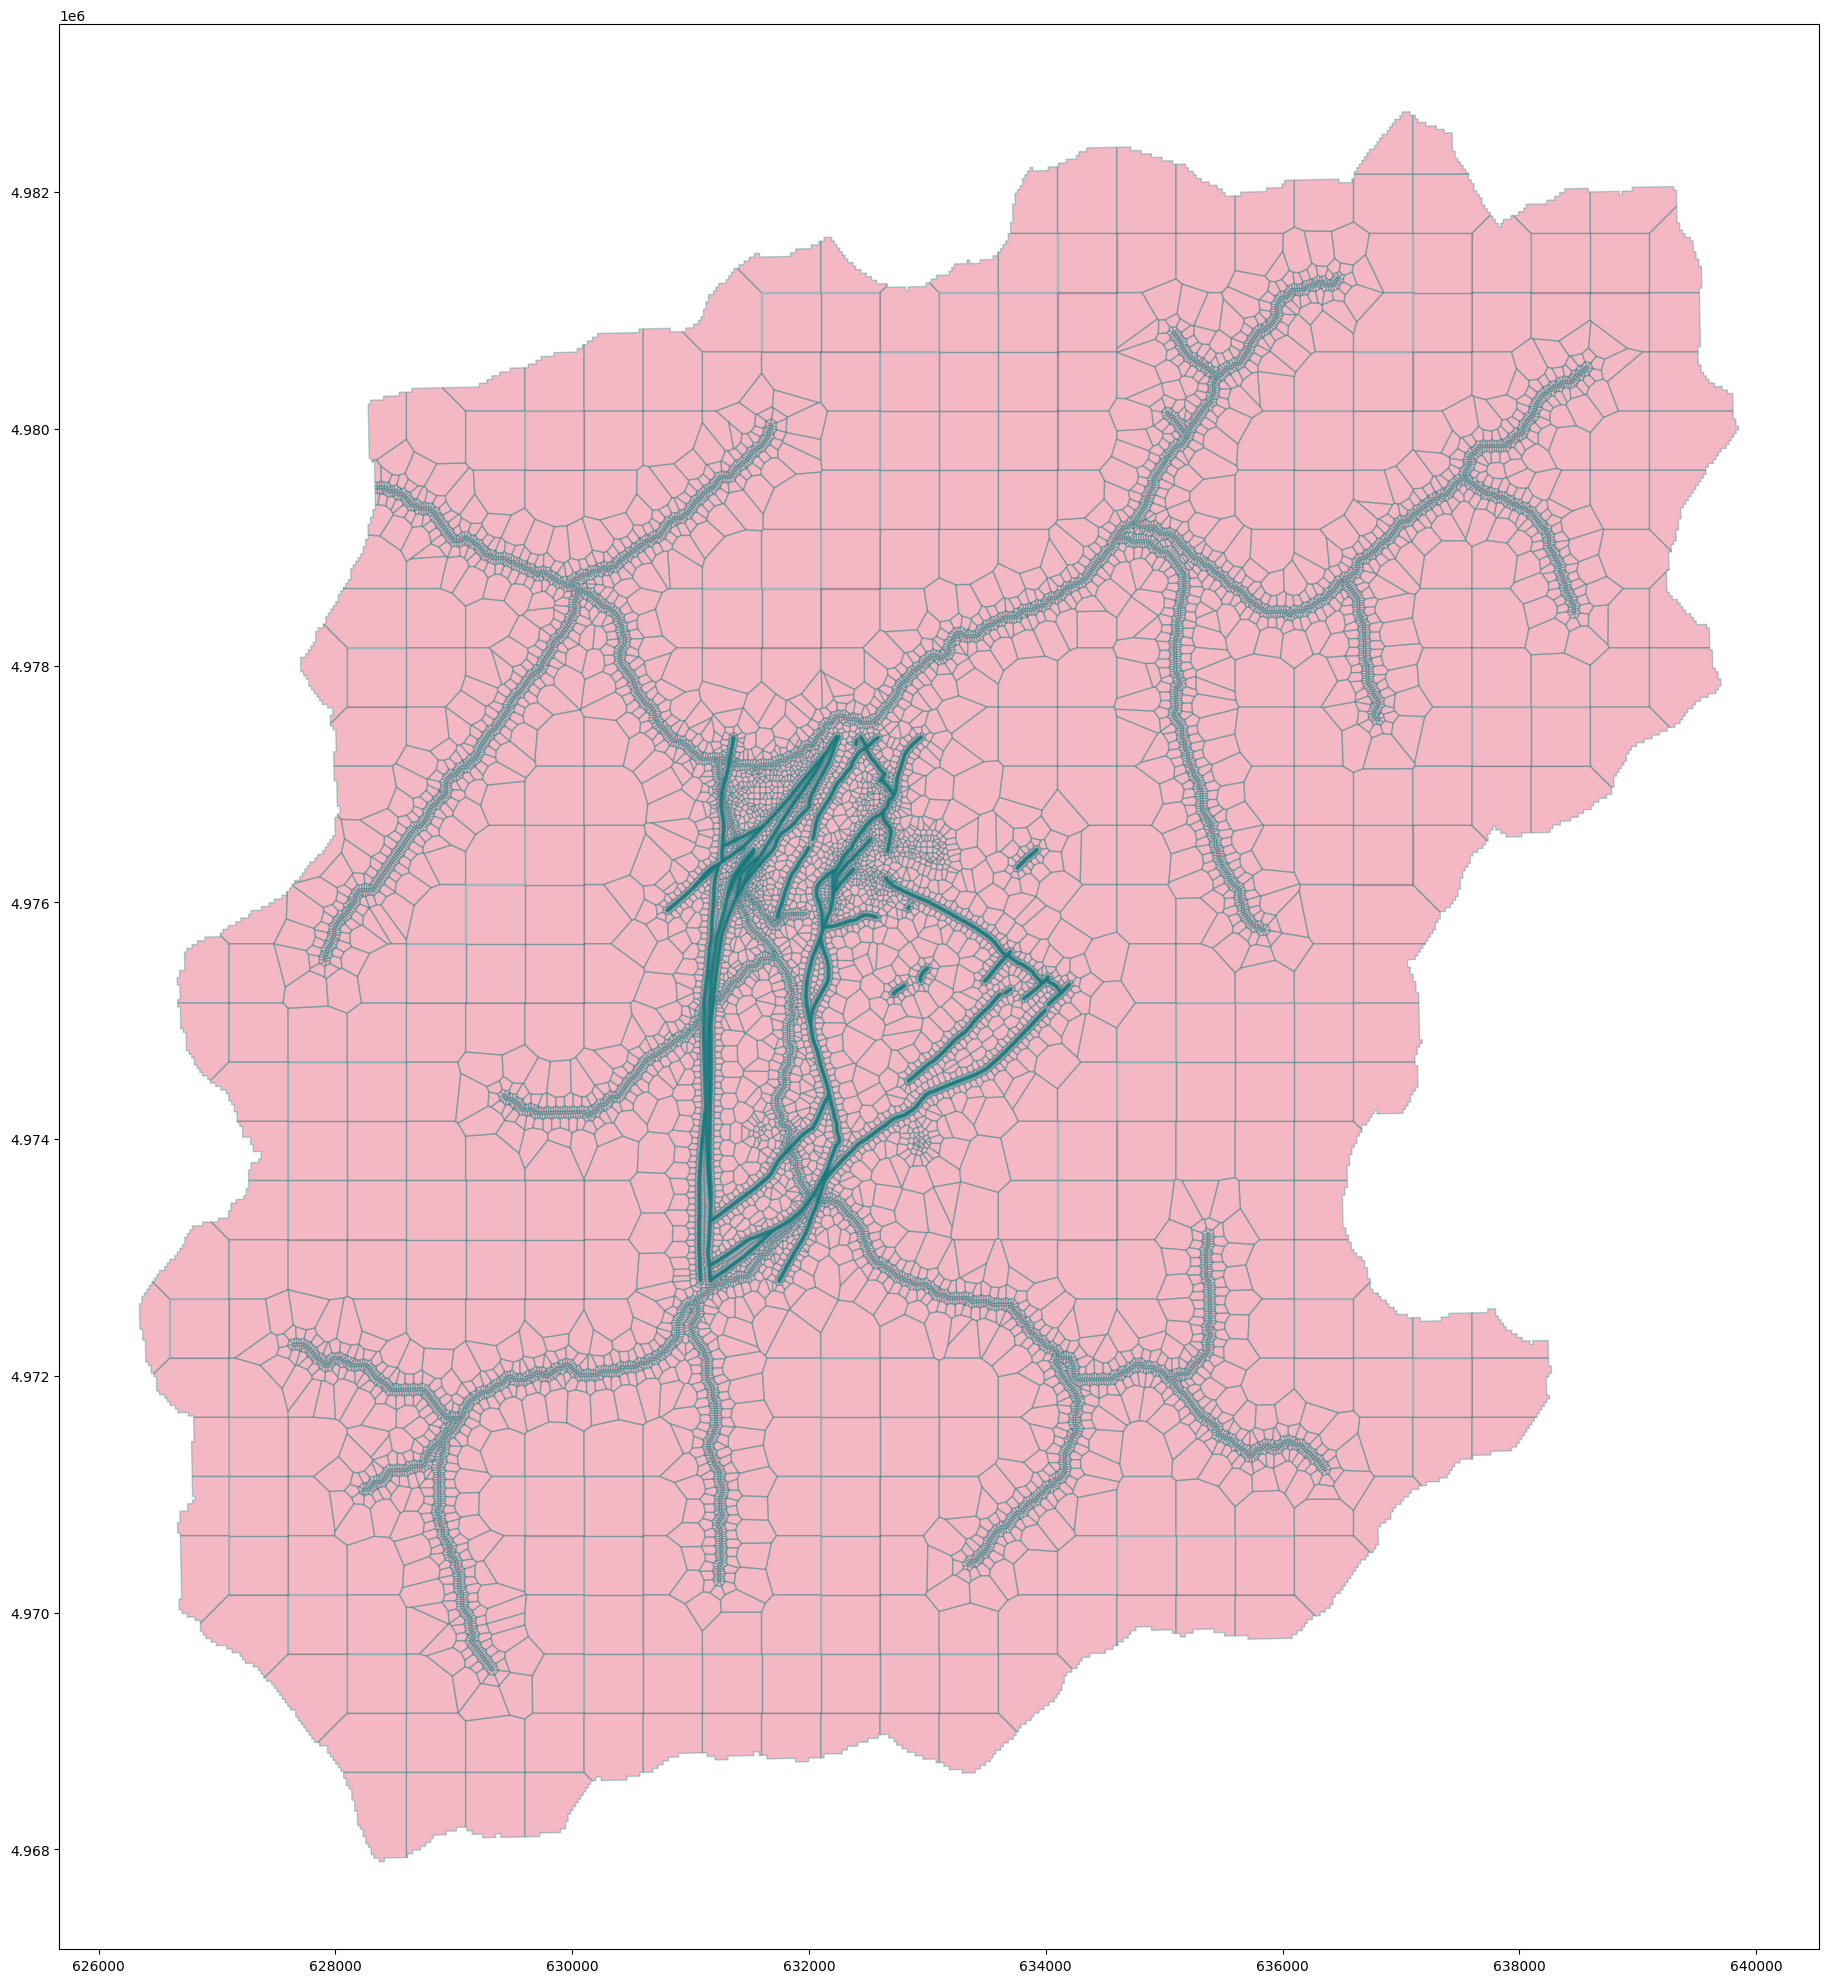

In [13]:
#plot the mesh
mesh.plot(figsize=(35,25), fc='crimson', alpha=0.3, ec='teal')